<a href="https://colab.research.google.com/github/Aafreen1804/PERSONAL-PROJECTS/blob/main/TASK_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**AUTHOR: AAFREEN**

**THIS TASK IS TOWARDS MY SUBMISSION FOR THE DATA SCIENCE AND BUSINESS ANALYST INTERNSHIP UNDER THE SPARKS FOUNDATION IN FULFILLMENT OF THE GRIP PROGRAM**

---

PROBLEM STATEMENT: Predict the percentage of an student based on the no. of study hours.

##IMPORTING NECESSARY LIBRARIES

In [4]:
import warnings
warnings.simplefilter('ignore')
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O 
import seaborn as sns #data visualization 
import matplotlib.pyplot as plt #interactive visualizations with  MATLAB-like interface

##GETTING THE DATA

In [5]:
url = "http://bit.ly/w-data"
data = pd.read_csv(url)
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


##EXPLORATORY DATA ANALYSIS

In [36]:
data.shape

(25, 2)

In [6]:
data.isna().sum() #NO MISSING VALUES

Hours     0
Scores    0
dtype: int64

In [7]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


##DATA VISUALIZATION USING SEABORN

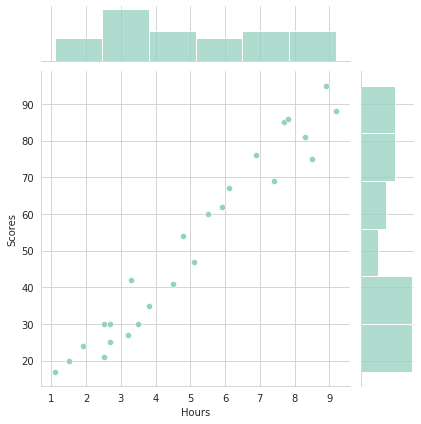

In [25]:
sns.jointplot(x='Hours',y='Scores',data=data)

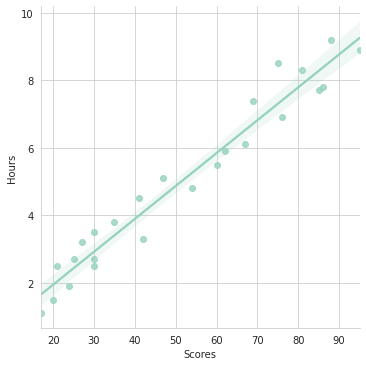

In [26]:
sns.lmplot(x='Scores',y='Hours',data=data)


THROUGH THE VISUALIZATIONS , IT BECOMES PRETTY CLEAR THAT THERE IS A POSITIVE LINEAR RELATION (Y=MX+C) BETWEEN THE NUMBER OF HOURS STUDEID AND SCORE

##TRAINING AND TESTING THE DATA

In [9]:
X = data.iloc[:,:-1]
X.head()

,Hours
0,2.5
1,5.1
2,3.2
3,8.5
4,3.5


In [56]:
y = data.iloc[:,-1]
y.head()

0    21
1    47
2    27
3    75
4    30
Name: Scores, dtype: int64

In [12]:
#splitting into trainign and testing data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [13]:
from sklearn.linear_model import LinearRegression 
lg=LinearRegression()

In [14]:
lg.fit(X_train,y_train) # train our model on our training data

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [48]:
print(lg.intercept_)
print(lg.coef_)

2.018160041434662
[9.91065648]


##PREDICTING TEST DATA

In [17]:
predictions = lg.predict(X_test)

In [30]:
# Comparing Actual vs Predicted
df = pd.DataFrame({'Actual': y_test, 'Predicted': predictions})  
df 

,Actual,Predicted
5,20,16.884145
2,27,33.732261
19,69,75.357018
16,30,26.794801
11,62,60.491033


Text(0, 0.5, 'Predicted Y')

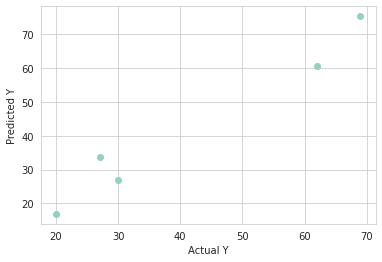

In [27]:
#creating a scatterplot of the real test values versus the predicted values
plt.scatter(y_test,predictions)
plt.xlabel('Actual Y')
plt.ylabel('Predicted Y')

In [55]:
#What will be predicted score if a student studies for 9.25 hrs/ day?
own_pred = lg.predict([[9.25]])
own_pred

array([93.69173249])

##EVALUATING THE MODEL

In [19]:
#these loss functiones measure the ratio between actual/reference and predicted
print('MAE :'," ", metrics.mean_absolute_error(y_test,predictions)) #MEAN ABSOLUTE ERROR
print('MSE :'," ", metrics.mean_squared_error(y_test,predictions)) #MEAN SQUARE ERROR
print('RMAE :'," ", np.sqrt(metrics.mean_squared_error(y_test,predictions))) # ROOT MEAN SQUARE ERROR

MAE :   4.183859899002982
MSE :   21.598769307217456
RMAE :   4.647447612100373


In [45]:
from sklearn.metrics import r2_score
r2_score(y_test, predictions ) # R SQUARED

0.9454906892105354